# Experiement 2


### Imports

In [1]:
import math, re
import glob, os

import matplotlib.pyplot as plt 

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture

from sklearn import metrics

# import logging
# from optparse import OptionParser
# import sys
# from time import time


# import pandas as pd
# from collections import Counter

# def tokenize(s):
#     """
#     Input: 
#         string s
#     Output: 
#         list of strings
#     """
#     return s.split()

# def preprocess(s, lowercase=True, strip_punctuation=True):
#     """
#     Input:
#         string s
#         boolean lowercase
#         boolean strip_punctuation
#     Return:
#         list of strings
#     """
#     punctuation = '.,?<>:;"\'!%'
#     if isinstance(s, str):
#         s = tokenize(s)
#     if lowercase:
#         s = [t.lower() for t in s]
#     if strip_punctuation:
#         s = [t.strip(punctuation) for t in s]
        
#     return s

# def token_frequency(tokens=None, tf={}, relative=False):
#     """
#     Input:
#         tokens = list of strings or None
#         tf = dict or None
#         relative = boolean
#     Return:
#         dictionary of token frequencies
#     """
#     for t in tokens:
#         if t in tf:
#             tf[t]+=1
#         else:
#             tf[t]=1
#     if relative:
#         total = sum([c for t, c in tf.items()])
#         tf = {t:tf[t]/total for t in tf}
#     return tf

###For google colab, Import drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### using ```glob``` module to retrieve files/pathnames of all .txt files (credit to [AZLyrics](https://azlyrics.com) for the lyrics of the artists)

In [3]:
path = '/content/gdrive/My Drive/all_albums_together/*.txt'
filenames = glob.glob(path)

tData = [] #2D list with text data, level 1: albums, level 2: words
tDataNames = []#album names

for fn in filenames: #populate album names
    print
    tDataNames.append(os.path.split(fn[45:])[1][:-4].replace('_', ' ').title())
    s = open(fn, 'r').read()
    tData.append(s)

###TFIFD and Hashing Vectorizer Function


In [4]:
def getVectorizer(featuresExtracted):
  hasher = HashingVectorizer(
      n_features=featuresExtracted,
      stop_words="english",
      alternate_sign=False,
      norm=None,
  )
  return make_pipeline(hasher, TfidfTransformer())

###LSA Intialization

In [5]:
svd = TruncatedSVD(random_state=0)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

##Trying and Plotting Different Clustering Models

In [6]:
#Creating a dictionary matching albums to their clusters
def createDict(labels):
  labelDictAlt = {}
  for m_l, l in zip(labels, tDataNames):
      curr = labelDictAlt.get(m_l, [])
      curr.append(l)
      labelDictAlt[m_l] = curr
  return labelDictAlt

###K Means Mini Batch

In [7]:
#Tuning Parameters
sDict = {}
for i in [200,400,600,800,1000,2000,4000,6000,8000,10000,20000,40000,60000,80000,100000]:
  vectorizer = getVectorizer(i)
  sparseMatrix = vectorizer.fit_transform(tData)
  processedData = lsa.fit_transform(sparseMatrix)
  for j in [4,5,6,7,8,9,10,11,12,13,14,15]:
    kmb = MiniBatchKMeans(n_clusters=j, random_state = 0)
    kmb.fit(processedData)
    sDict[(i,j)] = metrics.silhouette_score(processedData, kmb.labels_, metric = "euclidean")

print(max(list(sDict.values()))) # best results were 400 features extracted and 11 categories
sDict


0.6841600299286869


{(200, 4): 0.6329339281869388,
 (200, 5): 0.5936049337972976,
 (200, 6): 0.5886786189094849,
 (200, 7): 0.6105861651655903,
 (200, 8): 0.5737120968146284,
 (200, 9): 0.5972605077684334,
 (200, 10): 0.6352125955127187,
 (200, 11): 0.5828126619198705,
 (200, 12): 0.6090282639040061,
 (200, 13): 0.6317263589081425,
 (200, 14): 0.6439404769359003,
 (200, 15): 0.6199860384712715,
 (400, 4): 0.6461248901657377,
 (400, 5): 0.5944487934315611,
 (400, 6): 0.6022503806892575,
 (400, 7): 0.6208247977909979,
 (400, 8): 0.590333410195163,
 (400, 9): 0.6123677868032075,
 (400, 10): 0.6444669699772066,
 (400, 11): 0.6841600299286869,
 (400, 12): 0.6610946907250108,
 (400, 13): 0.6096057012628451,
 (400, 14): 0.6470190060039047,
 (400, 15): 0.6374891984140099,
 (600, 4): 0.628851008139606,
 (600, 5): 0.5830367520076288,
 (600, 6): 0.6262702164144711,
 (600, 7): 0.6105337502848911,
 (600, 8): 0.5801047639245521,
 (600, 9): 0.6541937587555274,
 (600, 10): 0.6520654387097116,
 (600, 11): 0.60853184033282

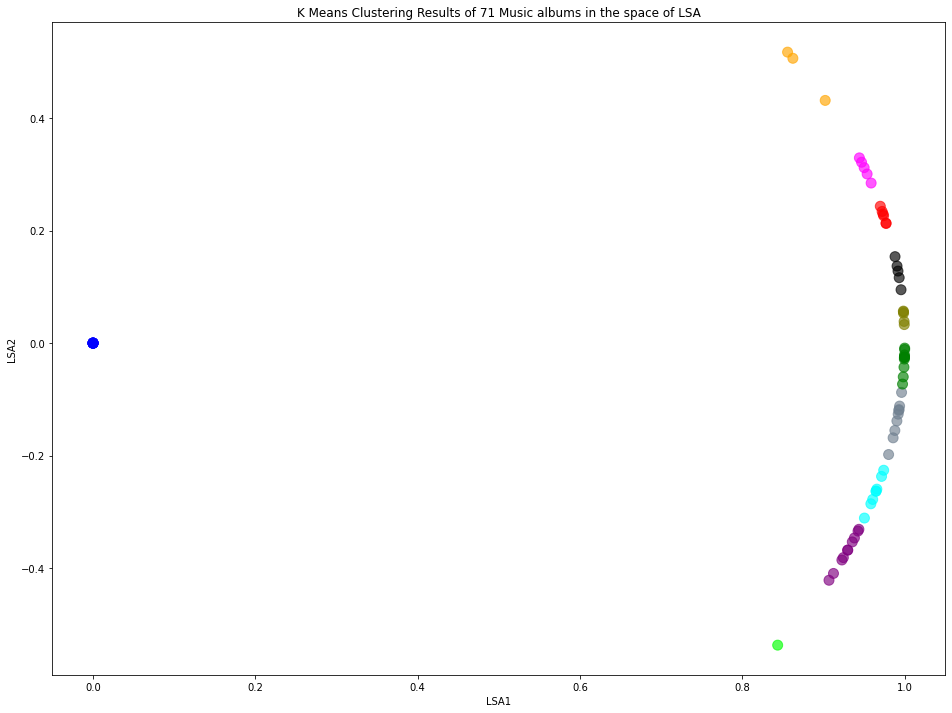

{0: ['Acdc Back In Black',
  'Acdc Dirty Deeds Done Dirt Cheap',
  'Billie Eilish Happier Than Ever',
  'Adele 25',
  'Charli Xcx Charli',
  'Limp Bizkit Significant Other',
  'Britney Spears Oops I Did It Again',
  'Kesha Warrior',
  'Rina Sawayama Sawayama',
  'Ariana Grande Dangerous Woman'],
 1: ['Behemoth The Satanist',
  'Death Grips The Money Store',
  'Tyler The Creator Igor',
  'Ozzy Osbourne Speak Of The Devil',
  'Neutral Milk Aeroplane Over The Sea',
  'Olivia Rodrigo Sour',
  'Prince Purple Rain',
  'Turnstile Glow On',
  'Elliot Smith Figure 8'],
 2: ['Beatles Sgt Pepper',
  'Michael Buble Christmas',
  'Imagine Dragons Night Visions',
  'Ed Sheeran +',
  'Metallica The Black Album',
  'Judas Priest Defenders Of Faith',
  'The Smiths The Smiths',
  'Fleetwood Mac Then Play On',
  'Sam Smith The Thrill Of It All',
  'The Beach Boys Little Deuce Coupe'],
 3: ['Baby Keem Die For My Bitch',
  'Lil Tecca We Love You Tecca',
  'Injury Reserve By The Time I Get To Phoenix'],
 4:

In [8]:
vectorizer = getVectorizer(400)
sparseMatrix = vectorizer.fit_transform(tData)
processedData = lsa.fit_transform(sparseMatrix)

kmb = MiniBatchKMeans(n_clusters=11, random_state = 0)
kmb.fit(processedData)

x = [x for x,y in processedData]
y = [y for x,y in processedData]

kMDict = createDict(kmb.labels_)

col_dict = {0:'green', 1:'blue', 2:'purple',3:'orange',4:'red',5:'cyan',6:'slategrey',7:'black',8: 'lime', 9:'magenta', 10:'olive'}
cols = [col_dict[l] for l in kmb.labels_]
plt.figure(figsize=(16,12))
plt.scatter(x,y, c=cols, s=100, alpha=.65)

plt.xlabel('LSA1')
plt.ylabel('LSA2')
plt.title("K Means Clustering Results of 71 Music albums in the space of LSA".format(20))
plt.show()

kMDict

###Gaussian Mixture

In [9]:
#Tuning Parameters
sDict = {}
for i in [200,400,600,800,1000,2000,4000,6000,8000,10000,20000,40000,60000,80000,100000]:
  vectorizer = getVectorizer(i)
  sparseMatrix = vectorizer.fit_transform(tData)
  processedData = lsa.fit_transform(sparseMatrix)
  for j in [4,5,6,7,8,9,10,11,12,13,14,15]:
    gm = GaussianMixture(n_components=j, random_state = 0)
    gm.fit(processedData)
    gmLabels = gm.predict(processedData)
    sDict[(i,j)] = metrics.silhouette_score(processedData, gmLabels, metric = "euclidean")

print(max(list(sDict.values()))) # best results were 4000 features extracted and 5 categories
sDict


0.6768324649695328


{(200, 4): 0.6329339281869388,
 (200, 5): 0.586464890595535,
 (200, 6): 0.6054534366849346,
 (200, 7): 0.6213465952388718,
 (200, 8): 0.5715223586792639,
 (200, 9): 0.6137915223960037,
 (200, 10): 0.6345740079891021,
 (200, 11): 0.6485773232506453,
 (200, 12): 0.6431756859886687,
 (200, 13): 0.6540544393724508,
 (200, 14): 0.6408321687397388,
 (200, 15): 0.6274708206892288,
 (400, 4): 0.6462022267461509,
 (400, 5): 0.5991131739949722,
 (400, 6): 0.565938621595474,
 (400, 7): 0.6193773896520051,
 (400, 8): 0.5917127771514205,
 (400, 9): 0.6043088422810379,
 (400, 10): 0.6366713990955679,
 (400, 11): 0.675714201117095,
 (400, 12): 0.6740532522764711,
 (400, 13): 0.665638952404552,
 (400, 14): 0.6549881868551692,
 (400, 15): 0.6684112779939254,
 (600, 4): 0.628851008139606,
 (600, 5): 0.5788914804649062,
 (600, 6): 0.5800194869189785,
 (600, 7): 0.6008422314436914,
 (600, 8): 0.6449025984387157,
 (600, 9): 0.6239910744221581,
 (600, 10): 0.6379659096131077,
 (600, 11): 0.6441616689551136,

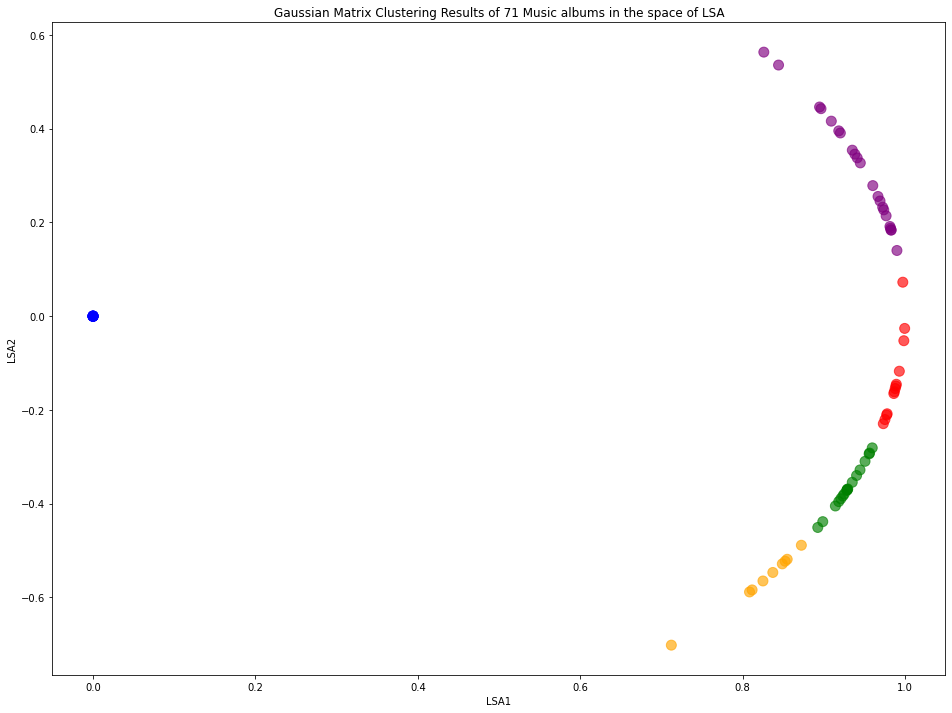

{0: ['Beatles With The Beatles',
  'Greenday American Idiot',
  'Nirvana In Utero',
  'Adele 25',
  'Gorillaz Demon Days',
  'Elton John Blue Moves',
  'Tame Impala Currents',
  'Niki Moonchild',
  'Amy Winehouse Back To Black',
  'The Eagles Hotel California',
  'David Bowie Blackstar',
  'The Doors Strange Days',
  'Radiohead In Rainbows',
  'The Strokes Room On Fire',
  'Linkin Park Hybrid Theory',
  'Taylor Swift Folklore',
  'Fleetwood Mac Then Play On',
  'The Beach Boys Little Deuce Coupe'],
 1: ['Behemoth The Satanist',
  'Death Grips The Money Store',
  'Tyler The Creator Igor',
  'Ozzy Osbourne Speak Of The Devil',
  'Neutral Milk Aeroplane Over The Sea',
  'Olivia Rodrigo Sour',
  'Prince Purple Rain',
  'Turnstile Glow On',
  'Elliot Smith Figure 8'],
 2: ['Kanye Graduation',
  'Drake Scorpion',
  'Drake More Life',
  'Drake Views',
  'Kanye Late Registration',
  'Kanye College Dropout',
  'Eminem Slim Shady Lp',
  'Eminem The Marshall Mathers Lp',
  'Eminem The Eminem Show

In [10]:
vectorizer = getVectorizer(4000)
sparseMatrix = vectorizer.fit_transform(tData)
processedData = lsa.fit_transform(sparseMatrix)

gm = GaussianMixture(n_components=5, random_state = 0)
gm.fit(processedData)
gmLabels = gm.predict(processedData)

x = [x for x,y in processedData]
y = [y for x,y in processedData]

gMDict = createDict(gmLabels)

col_dict = {0:'green', 1:'blue', 2:'purple',3:'orange',4:'red',5:'cyan',6:'slategrey',7:'black',8: 'lime', 9:'magenta', 10:'olive'}
cols = [col_dict[l] for l in gmLabels]
plt.figure(figsize=(16,12))
plt.scatter(x,y, c=cols, s=100, alpha=.65)

plt.xlabel('LSA1')
plt.ylabel('LSA2')
plt.title("Gaussian Matrix Clustering Results of 71 Music albums in the space of LSA".format(20))
plt.show()

gMDict